#  City Of Pittsburgh Parks 

### Links to Datasets:
1. [Parks Dataset](https://data.wprdc.org/dataset/parks1/resource/bb57d0a7-e8ee-4218-8906-0dedc903038c?inner_span=True)
2. [Neighborhoods Dataset](https://data.wprdc.org/dataset/neighborhoods2)

### Metric: Environment and Accessibility

Neighborhoods with parks enjoy a myriad of benefits that significantly enhance residents' quality of life. Parks serve as communal hubs, fostering social connections and a sense of community, while also providing spaces for physical activities that promote both physical and mental well-being.

# Data Exploration
First we see what neighborhood has the most amount of parks. The more Parks means the more accessibility for the community making it a better place ultimatley giving it a better chance of being the top neighborhood. The less parks the worse neighborhood in this case. We will take the top 10 for parks and see which neighborhood has the most parks. first we need to import files.

In [7]:
import pandas as pd

# Load Parks CSV using a relative path
parks_df = pd.read_csv('Parks.csv')

# Load Neighborhood CSV using a relative path
neighborhood_df = pd.read_csv('neighborhoods.csv')


Next we need to find the top 10 neighborhoods with the most parks. There is a lot of parks with neighborhoods, but we need to seperate them and find the top 10. Also we have to specify the type to park because there is some that aren't considered a park specifically.

In [8]:
# Filter rows type is Park
parks_df = parks_df[parks_df['type'] == 'Park']

# Group by count the number of parks 
neighborhood_park_counts = parks_df['neighborhood'].value_counts()

# Find the top 10
top_10_neighborhoods = neighborhood_park_counts.head(10).index

# DataFrame maximum number of parks in each neighborhood
top_10_parks_df = pd.DataFrame({'neighborhood': top_10_neighborhoods, 'max_parks': neighborhood_park_counts[top_10_neighborhoods]})
top_10_parks_df = top_10_parks_df.sample(frac=1).reset_index(drop=True)

result_df = pd.merge(parks_df, top_10_parks_df, on='neighborhood')
result_df

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,max_parks
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197,6
1,8,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855,6
2,23,1990832198,Beechview Healthy Active Living Center Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.410721,-80.024362,6
3,151,1572177418,Pauline Park,Park,Parks - Southern,NaN,Beechview,4,19,42003192000,5,19,6,4-28,40.404576,-80.025946,6
4,182,1504989458,Tropical Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003191600,5,19,6,4-28,40.422261,-80.023991,6
5,186,1952724428,Vanucci Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414811,-80.017843,6
6,11,1928748922,Arlington Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418283,-79.975050,6
7,37,712782057,Cobden Street Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.419338,-79.968198,6
8,55,303472511,Eleanor Street Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.421408,-79.972879,6
9,132,375307767,Monongahela Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.421699,-79.966333,6


Now there is a lot more data then we need. So we need to take specific columns to get the display we want with the neighborhood, total number of parks, and latitude and longitude.

In [11]:
# Group number of parks in each neighborhood
neighborhood_park_counts = parks_df['neighborhood'].value_counts()

# Most parks data
top_10_neighborhoods = neighborhood_park_counts.head(10).index

# Maximum number of parks in each neighborhood
top_10_parks_df = pd.DataFrame({'neighborhood': top_10_neighborhoods, 'max_parks': neighborhood_park_counts[top_10_neighborhoods]})

# Descending order
top_10_parks_df = top_10_parks_df.sort_values(by='max_parks', ascending=False).reset_index(drop=True)

neighborhood_coords = parks_df.groupby('neighborhood')[['longitude', 'latitude']].first()

# Merge 
top_10_parks_df = pd.merge(top_10_parks_df, neighborhood_coords, left_on='neighborhood', right_index=True)
top_10_parks_df.head(10)

,neighborhood,max_parks,longitude,latitude
0,Beechview,6,-80.028197,40.408118
1,South Side Slopes,6,-79.975050,40.418283
2,Troy Hill,5,-79.988924,40.458690
3,Hazelwood,5,-79.945672,40.403974
4,Mount Washington,5,-80.008521,40.432901
5,Elliott,4,-80.043455,40.439462
6,Sheraden,4,-80.066199,40.459298
7,Marshall-Shadeland,4,-80.030594,40.462518
8,East Liberty,4,-79.918745,40.462065
9,Brighton Heights,3,-80.029606,40.485600


Next we will display all the neighborhoods that don't have parks. These neighborhoods will be at a set back when finding the top neighborhoods in Pittsburgh. We need to seperate the neighborhoods in the park file with the hood in the neighborhood file to find the ones that don't have parks.

In [15]:
# Merge
merged_df = pd.merge(neighborhood_df, parks_df, left_on='hood', right_on='neighborhood', how='left')

# Has a park or not
merged_df['has_park'] = merged_df['name'].notnull()

# Separate sets
neighborhoods_with_parks = merged_df[merged_df['has_park'] == True]
neighborhoods_without_parks = merged_df[merged_df['has_park'] == False]

print("Neighborhoods without Parks:")
print(neighborhoods_without_parks[['hood']])

Neighborhoods without Parks:
                     hood
8               Knoxville
15             Glen Hazel
36      Northview Heights
39      Arlington Heights
68         Allegheny West
86              Overbrook
87             Friendship
99         East Allegheny
118        Chartiers City
160             Ridgemont
166           South Shore
167            Mt. Oliver
168  California-Kirkbride
187             St. Clair
188               Chateau
189             Shadyside
190           Summer Hill


Next we will make a bar chart to display the data clearly in a different way. We'll make the chart go from left to right so the top neighborhood Beechview to the 10th being Brighton Heights.

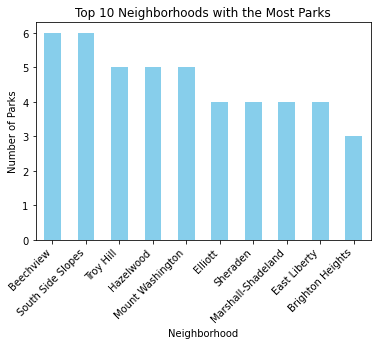

In [17]:
import matplotlib.pyplot as plt

parks_df = parks_df[parks_df['type'] == 'Park']

# Group by number of parks in each neighborhood
neighborhood_park_counts = parks_df['neighborhood'].value_counts()
top_10_neighborhoods = neighborhood_park_counts.head(10)

top_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with the Most Parks')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Parks')
plt.xticks(rotation=45, ha='right')
plt.show()

Next we will import the map of the neighborhoods of the city of Pittsburgh.

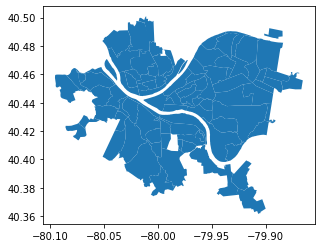

In [19]:
import geopandas as gpd

# Load GeoDataFrame 
neighborhood_map = gpd.read_file("NeighborhoodMap/Neighborhoods_.shp")
neighborhood_map.plot()

Last we will make a map to display where the top neighborhoods are at on the map. The darkest red will display the top neighborhoods the lighter the color the less parks they will have. We can also use the data to see if the neighborhoods are close to each other to see if the commutities are closely correlated. 

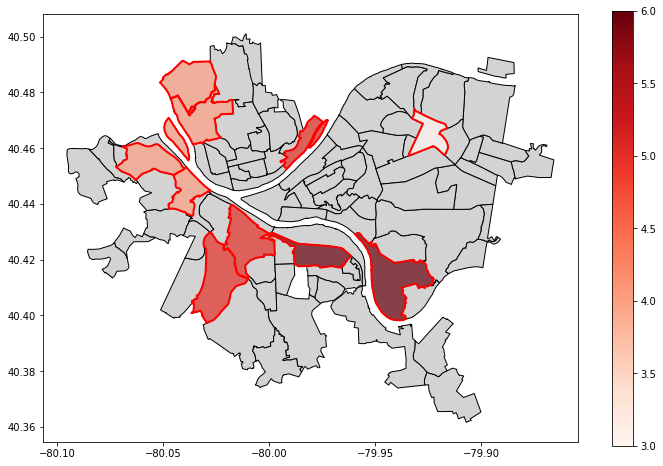

In [20]:
# The top 10 neighborhoods and their coordinates
top_10_neighborhoods = ['Beechview', 'South Side Slopes', 'Troy Hill', 'Hazelwood',
                         'Mount Washington', 'Elliott', 'Sheraden', 'Marshall-Shadeland',
                         'East Liberty', 'Brighton Heights']

top_10_parks = [6, 6, 5, 5, 5, 4, 4, 4, 4, 3]  # Number of parks for each neighborhood

top_10_coords = neighborhoodMap[neighborhoodMap['hood'].isin(top_10_neighborhoods)].copy()
top_10_coords['max_parks'] = top_10_parks

fig, ax = plt.subplots(figsize=(12, 8))
neighborhoodMap.plot(ax=ax, color='lightgrey', edgecolor='black')

top_10_coords.boundary.plot(ax=ax, color=None, edgecolor='red', linewidth=2, marker='o', markersize=50)
top_10_coords.plot(ax=ax, column='max_parks', cmap='Reds', linewidth=0, alpha=0.7, legend=True)

# Display plot
plt.show()


## Conclusion
---

Based on just the metric of envirement/accessability of parks in a neighborhood, we can see two top contenders. Beechview and South Side Slopes both have 6 total parks each making it the best neighborhoods in this data set. With the data set we were looking for the most parks in quantity. Having one more park then your opposing neighborhood could have a big impact on your competition as we can see here. To figure out which one is better more data sets would have to be involved to determine the winner. These two neighborhoods have to be included in the question of which neighborhood is the best in the city of Pittsburgh. 
